# Évolution du parc végétal de Grenoble

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Download the [Dataset](https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv)
(https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv)


In [2]:
url = 'https://entrepot.metropolegrenoble.fr/opendata/38185-GRE/EspacePublic/csv/ESP_PUBLIC.IDENTITE_ARBRE.csv'
df = pd.read_csv(url, low_memory=False)

In [3]:
df.min()

C:\Users\Ambroise\AppData\Local\Temp/ipykernel_9908/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


ELEM_POINT_ID                                  1
CODE                                    ESP10000
NOM                                     ESP10000
GENRE                                        VEG
GENRE_DESC                                 ESP01
CATEGORIE                                  Arbre
CATEGORIE_DESC                             Arbre
SOUS_CATEGORIE                   Arbre de voirie
SOUS_CATEGORIE_DESC    Arbre d'enceintes fermées
CODE_PARENT                                ESP10
CODE_PARENT_DESC                               2
ADR_SECTEUR                                    1
BIEN_REFERENCE                           AR10000
EQUIPE                                       NaN
ANNEEDEPLANTATION                         1900.0
COURRIER                                     NaN
IDENTIFIANTPLU                               2.0
ANNEEABATTAGE                                NaN
ESSOUCHEMENT                                 NaN
DIAMETREARBRE                                NaN
dtype: object

In [8]:
yearPlantationRange = widgets.IntSlider(
    value=7,
    min=1900,
    max=2021,
    step=1,
    description='Année de Plantation:',
    disabled=False,
    continuous_update=False,
    readout=True,
    readout_format='d'
)

In [9]:
df.ANNEEDEPLANTATION.unique()

array([1977., 2001., 1975., 1978., 1960., 2000., 1944., 1991., 2012.,
       1980., 1992., 1982., 1986., 2004., 1965., 1924., 1990., 2010.,
       1999., 1998., 1979., 2006., 1994., 1995., 1976., 1985., 1972.,
       2009., 2011., 1950., 2005., 1971., 1984., 1987., 1983., 1970.,
       1981., 1996., 1955., 2003., 2002., 2007., 1997., 1993., 1988.,
         nan, 2017., 2016., 2018., 2015., 1959., 1966., 1989., 1974.,
       2008., 2013., 1969., 2014., 1967., 1973., 1968., 1964., 2019.,
       2020., 1900., 2021.])

In [24]:
int_range = widgets.IntSlider()
output2 = widgets.Output()

#display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

int_range.observe(on_value_change, names='value')

In [85]:
display(df)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,23881,ESP29285,ESP29285,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP639,...,NaN,170.0,Alignement,L 123-1.7,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7436272177661..."
1,23886,ESP29286,ESP29286,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7448701441213..."
2,23891,ESP29287,ESP29287,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7422258900484..."
3,23895,ESP29288,ESP29288,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7447571861843..."
4,12182,ESP29289,ESP29289,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7366655831041..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31614,30028,ESP31275,ESP31275,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7243716154461..."
31615,30029,ESP31276,ESP31276,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7245238150976..."
31616,30030,ESP31277,ESP31277,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7246681137245..."
31617,30031,ESP31278,ESP31278,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7249966111508..."


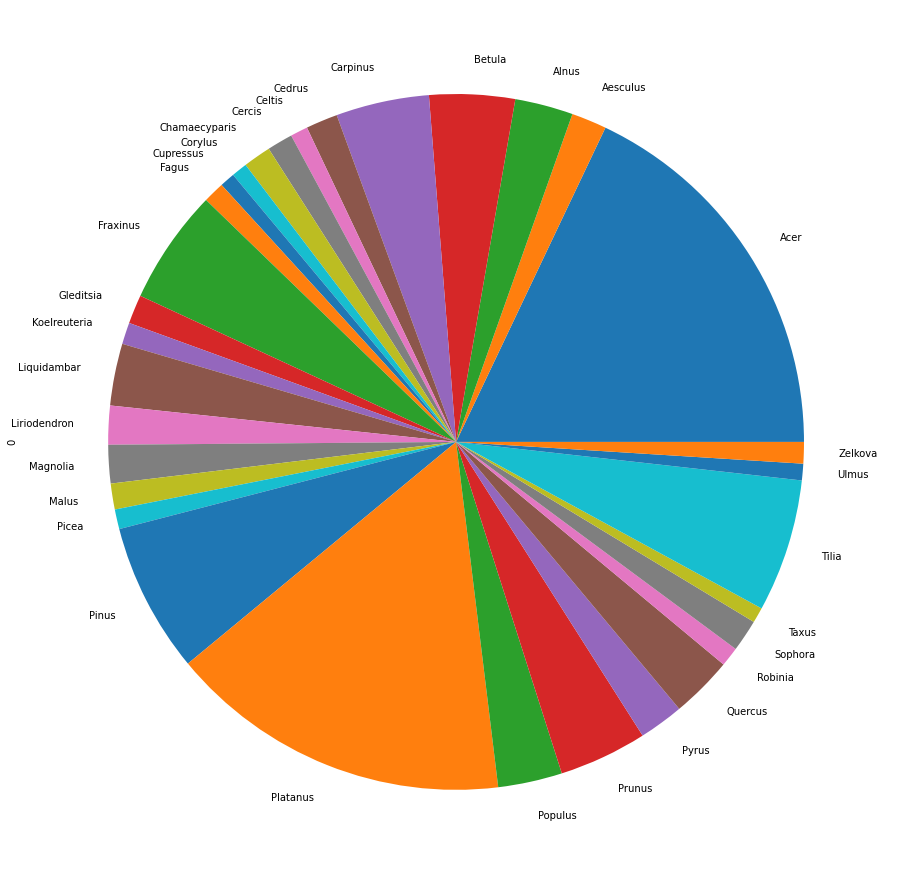

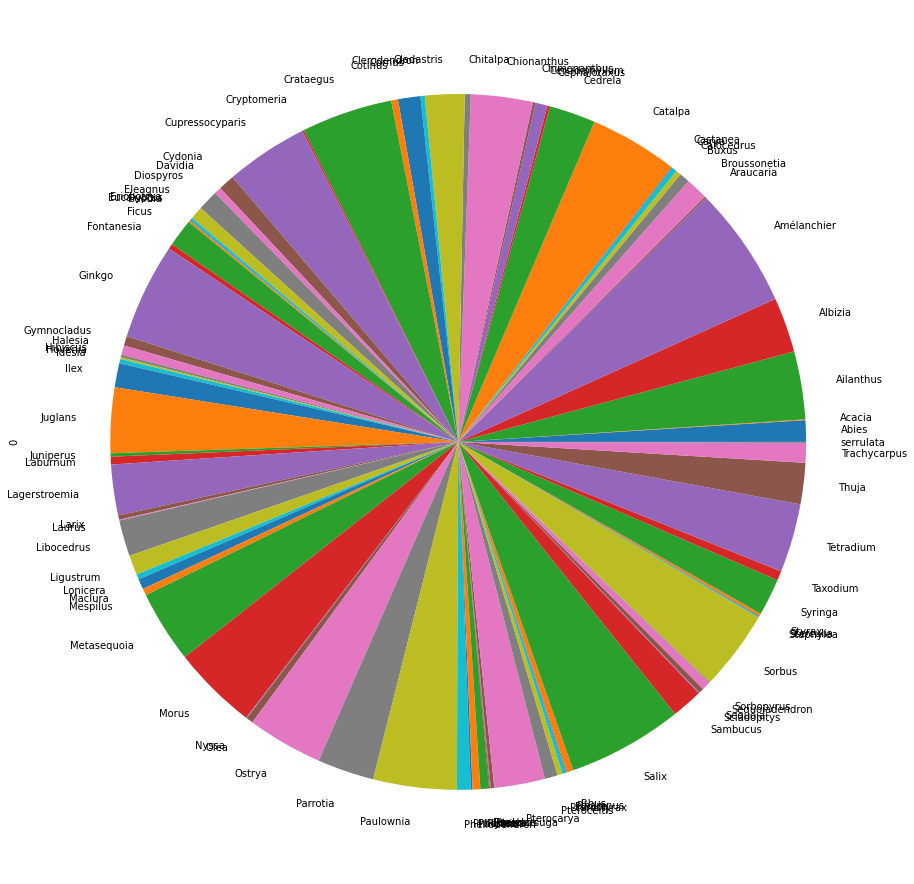

In [86]:
genreBotanique = pd.DataFrame(df["GENRE_BOTA"])
test = genreBotanique.groupby('GENRE_BOTA').value_counts()
grr = argh[argh >= 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)
grr = argh[argh < 150].dropna().plot.pie(figsize=(16,16), subplots=True, legend=False)